In [43]:
import numpy as np

In [44]:
def distances(X,y, w, with_lagrange=True):
        distances = y * (np.dot(X, w)) - 1

        # get distance from the current decision boundary
        # by considering 1 width of margin

        if with_lagrange:  # if lagrange multiplier considered
            # if distance is more than 0
            # sample is not on the support vector
            # Lagrange multiplier will be 0
            distances[distances > 0] = 0

        return distances

In [45]:
def get_cost_grads(X, w, y,C):

        distances_d = distances(X,y,w)

        # Get current cost
        L = 1 / 2 * np.dot(w, w) - C * np.sum(distances_d)

        dw = np.zeros(len(w))

        for ind, d in enumerate(distances_d):
            if d == 0:  # if sample is not on the support vector
                di = w  # (alpha * y[ind] * X[ind]) = 0
            else:
                # (alpha * y[ind] * X[ind]) = y[ind] * X[ind]
                di = w - (C * y[ind] * X[ind])
            dw += di
        return L, dw / len(X)

In [46]:

def fit(num_of_epochs,X, w, y,C,lr):
        for i in range(num_of_epochs):
            L, dw = get_cost_grads(X, w, y,C)
            w = w - lr * dw
            if i % 1000 == 0:
                print(i, ' | ', L)

In [47]:
def predict(X,w):
  X = np.column_stack((np.ones(len(X)), X))
  return np.sign(X @ w)

dimension of x1 = x2 = (500, 2)


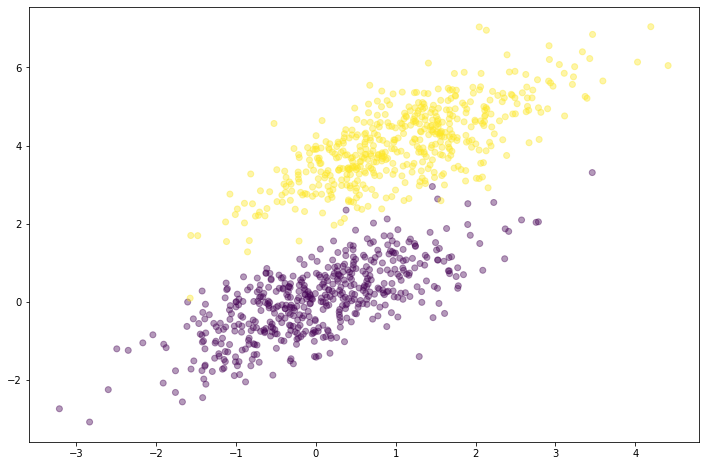

In [48]:
si = 500  #size of the data set we are creating
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], si)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], si)
print("dimension of x1 = x2 =",x1.shape)
sfeature=np.vstack((x1, x2)).astype(np.float32)     #concatinates axis 0
slabel=np.hstack((np.zeros(si), np.ones(si)))  
plt.figure(figsize=(12,8))
plt.scatter(sfeature[:, 0], sfeature[:, 1], c = slabel, alpha = .4)

In [49]:
X = np.column_stack((np.ones(len(sfeature)), sfeature)) 
w = np.ones(len(X[0]))

fit(10000, X , w , slabel , C=30 , lr=1e-3)

p = np.sign(clf.predict(train_x))
p = p - train_y.flatten()

# Prediction accuracy should be 1.0 for the training set
print("Accuracy |", len(np.where(p == 0)[0]) / len(p))

0  |  15045.771712079644
1000  |  15046.710342370638
2000  |  15036.982549790811
3000  |  15036.038414517618
4000  |  15036.569923565108
5000  |  15036.765426579257
6000  |  15036.837321548835
7000  |  15036.86375827187
8000  |  15036.873479105901
9000  |  15036.877053435344
Accuracy | 0.5
